In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
#example of portfolio as an array
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for i in tickers:
    mydata[i] = wb.DataReader(i, data_source = 'yahoo', start = '1995-1-1')['Adj Close']

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6441 entries, 1995-01-03 to 2020-07-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6441 non-null   float64
 1   MSFT    6441 non-null   float64
 2   F       6441 non-null   float64
 3   GE      6441 non-null   float64
dtypes: float64(4)
memory usage: 251.6 KB


In [6]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.280613,2.406834,3.262354,2.725145
1995-01-04,6.230266,2.424330,3.350130,2.725145
1995-01-05,6.142162,2.384342,3.320871,2.731823
1995-01-06,6.154748,2.424330,3.320871,2.718464
1995-01-09,6.129573,2.409335,3.379390,2.691748


In [7]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-07-27,126.320000,203.850006,6.93,6.71
2020-07-28,127.879997,202.020004,7.01,6.89
2020-07-29,128.309998,204.059998,6.92,6.59
2020-07-30,131.419998,203.899994,6.74,6.26
2020-07-31,130.199997,200.460007,6.72,6.06


Normalizing to 100 : Pt / P0 * 100

In [9]:
mydata.iloc[0]

PG      6.280613
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

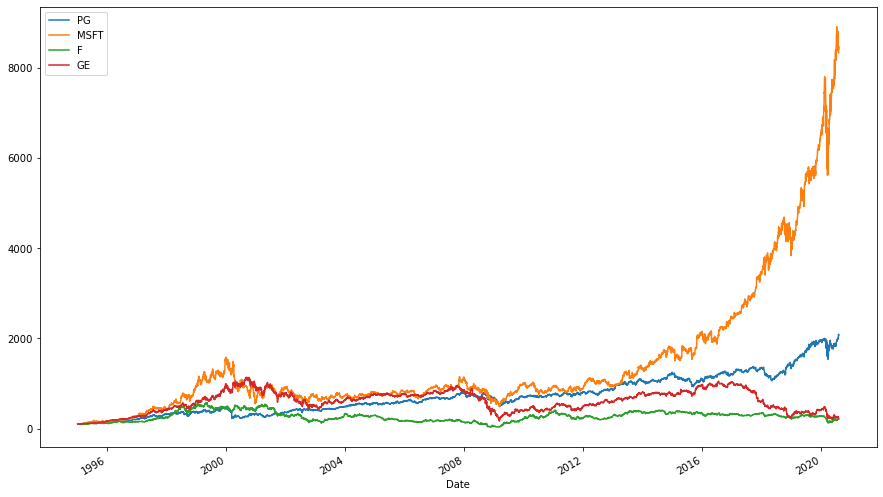

In [11]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,9))

In [13]:
returns = mydata/mydata.shift(1) -1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009828


In [14]:
weights = np.array([0.25,0.25,0.25,0.25])

In [18]:
returnsA = returns.mean() *250
returnsA

PG      0.143602
MSFT    0.221741
F       0.108092
GE      0.081838
dtype: float64

In [19]:
np.dot(returnsA,weights)

0.1388181039523975

In [24]:
portf1 = round(np.dot(returnsA,weights),4)*100

In [25]:
print(str(portf1)+'%')

13.88%
